## FASE 1: EXPLORACIÓN Y LIMPIEZA

### 1. Exploración inicial: 

- Realiza una exploración inicial de los datos para identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas relevantes.

- Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la presencia de valores nulos y estadisticas básicas de las columnas involucradas.

- Une los dos conjuntos de datos de la forma más eficiente.

### 2. Limpieza de datos:

- Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar que los datos estén completos.

- Verifica la consistencia y corrección de los datos para asegurarte de que los datos se presenten de forma coherente.

- Realiza cualquier ajuste o conversión necesaria en las columnas (por ejemplo, cambiar tipos de datos) para garantizar la adecuación de los datos para el análisis estadístico.

In [84]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [85]:
# Aplico una función para leer los datos de los dos ficheros:
def leer_datos(ruta, sep=","):

    df = pd.read_csv(ruta, sep=sep)
    return df

# Para hacer la llamada de la función
df_customer_flight=leer_datos('customer_flight_activity.csv', sep=";")
print(f'Fichero Customer Flight:\n')
print(df_customer_flight)

print("\n - - - - - - - - - - - - - - - - - - - \n")

df_customer_loyalty=leer_datos('customer_loyalty_history.csv', sep=";")
print(f'Fichero Customer Loyalty:\n')
print(df_customer_loyalty)

Fichero Customer Flight:

       Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0                        100018,2017,1,3,0,3,1521,152,0,0                                                                                                    
1                      100102,2017,1,10,4,14,2030,203,0,0                                                                                                    
2                        100140,2017,1,6,0,6,1200,120,0,0                                                                                                    
3                             100214,2017,1,0,0,0,0,0,0,0                                                                                                    
4                             100272,2017,1,0,0,0,0,0,0,0                                                                                                    
...                       

**Abriendo los ficheros, me doy cuenta de que tienen todas las variables en una única columna.**

**Hay que separarlas, usando la coma cómo separador de columnas.**

In [86]:
#Voy a dividir la columna de Customer Flight en 10 columnas, utilizando las comas para dividir las columnas:

df_split_flight = df_customer_flight[
    'Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed'
    ].str.split(',', expand=True) 

# Voy a asignar los nombres a las columnas:
df_split_flight.columns = [
    'Loyalty Number', 'Year', 'Month', 'Flights Booked', 'Flights with Companions',
    'Total Flights', 'Distance', 'Points Accumulated', 'Points Redeemed',
    'Dollar Cost Points Redeemed'
]

# Con head visualizo las primeras 5 filas de mi nuevo dataframe
df_split_flight.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152,0,0
1,100102,2017,1,10,4,14,2030,203,0,0
2,100140,2017,1,6,0,6,1200,120,0,0
3,100214,2017,1,0,0,0,0,0,0,0
4,100272,2017,1,0,0,0,0,0,0,0


In [87]:
# En el fichero Loyalty, voy a dividir la columna en 16 columnas, utilizando las comas para dividir las columnas

df_split_loyalty = df_customer_loyalty[
    'Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month'
    ].str.split(',', expand=True) 

# Voy a asignar los nombres a las columnas:
df_split_loyalty.columns = [
   'Loyalty Number', 'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education', 
   'Salary', 'Marital Status', 'Loyalty Card', 'CLV' , 'Enrollment Type', 'Enrollment Year', 
   'Enrollment Month', 'Cancellation Year', 'Cancellation Month'
]

df_split_loyalty.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236,Married,Star,3839.14,Standard,2016,2,,
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,,Divorced,Star,3839.61,Standard,2016,3,,
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,,Single,Star,3839.75,Standard,2014,7,2018,1
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,,Single,Star,3839.75,Standard,2013,2,,
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495,Married,Star,3842.79,Standard,2014,10,,


**Ahora que tengo los ficheros divididos en columnas, voy a analizarlos con una función para comprobar si hay valores nulos, duplicados, atípicos o datos faltantes.**

In [88]:
def explorar_dataset(df): # Función generica para una visión general del dataset

    print("Tamaño del dataset:")# Tamaño del dataset (filas y columnas)
    print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}") # Tamaño del dataset (filas y columnas)
    print("\nTipos de datos:") # Tipos de datos por columna
    display(df.dtypes)
    print("\nValores_nulos:") # Valores nulos
    display(df.isnull().sum())
    print("Filas duplicadas en el dataset:")
    print(f"Filas: {df.duplicated().sum()}") # Calculando la cantidad de filas duplicadas en el df



# Llamamos a la función para ver los datos de cadauno de los df e imprimimos resultados:

print(f'Dataframe actividad vuelos clientes:')
explorar_dataset(df_split_flight)
print('_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _', '\n')
print(f'Dataframe historial clientes:')
explorar_dataset(df_split_loyalty)


Dataframe actividad vuelos clientes:
Tamaño del dataset:
Filas: 405624, Columnas: 10

Tipos de datos:


Loyalty Number                 object
Year                           object
Month                          object
Flights Booked                 object
Flights with Companions        object
Total Flights                  object
Distance                       object
Points Accumulated             object
Points Redeemed                object
Dollar Cost Points Redeemed    object
dtype: object


Valores_nulos:


Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

Filas duplicadas en el dataset:
Filas: 1864
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

Dataframe historial clientes:
Tamaño del dataset:
Filas: 16737, Columnas: 16

Tipos de datos:


Loyalty Number        object
Country               object
Province              object
City                  object
Postal Code           object
Gender                object
Education             object
Salary                object
Marital Status        object
Loyalty Card          object
CLV                   object
Enrollment Type       object
Enrollment Year       object
Enrollment Month      object
Cancellation Year     object
Cancellation Month    object
dtype: object


Valores_nulos:


Loyalty Number        0
Country               0
Province              0
City                  0
Postal Code           0
Gender                0
Education             0
Salary                0
Marital Status        0
Loyalty Card          0
CLV                   0
Enrollment Type       0
Enrollment Year       0
Enrollment Month      0
Cancellation Year     0
Cancellation Month    0
dtype: int64

Filas duplicadas en el dataset:
Filas: 0


#### Hay algunos aspectos importantes a considerar:

#### Hay valores vacíos en algunas columnas ('Salary', 'Cancellation Year' y 'Cancellation Month'). 

#### Son valores faltantes que tengo que tratar en la fase de limpieza.
#### Para verificar duplicados de manera más efectiva, voy a enfocarme en el 'Loyalty Number', ya que es un identificador único para cada cliente. 

In [89]:
# Verificar duplicados de Loyalty Number en el df flight
duplicados_flight = df_split_flight[df_split_flight.duplicated(subset=['Loyalty Number'], keep='first')]
print("Número de Loyalty Numbers duplicados en df flight:", len(duplicados_flight))

# Ver los Loyalty Number que están duplicados (si hay alguno)
if len(duplicados_flight) > 0:
    print("\nLoyalty Numbers duplicados en df flight:")
    print(duplicados_flight['Loyalty Number'].values)

Número de Loyalty Numbers duplicados en df flight: 388887

Loyalty Numbers duplicados en df flight:
['100504' '100504' '101902' ... '999940' '999982' '999986']


#### Los valores duplicados en este df tienen sentido, son debidos a que un cliente puede haber reservado más vuelos.
#### Hay que tenerlo en cuenta a la hora de unir los dos df.

#### COMPROBAMOS CON LOS VALORES ÚNICOS EN LOS DOS DF:

In [90]:
# Verificar el número de valores únicos en cada columna de los dos df:

print('VALORES ÚNICOS EN DF FLIGHT:\n')

for columna in df_split_flight.columns: 
    n_unicos = df_split_flight[columna].nunique() # Valores unicos en cada columna

    print(f"{columna}: {n_unicos} valores únicos")

print('_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _', '\n')

print('VALORES ÚNICOS EN DF LOYALTY:\n')

for columna in df_split_loyalty.columns:
    n_unicos = df_split_loyalty[columna].nunique()

    print(f"{columna}: {n_unicos} valores únicos")


    

VALORES ÚNICOS EN DF FLIGHT:

Loyalty Number: 16737 valores únicos
Year: 2 valores únicos
Month: 12 valores únicos
Flights Booked: 22 valores únicos
Flights with Companions: 12 valores únicos
Total Flights: 33 valores únicos
Distance: 4746 valores únicos
Points Accumulated: 1549 valores únicos
Points Redeemed: 587 valores únicos
Dollar Cost Points Redeemed: 49 valores únicos
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

VALORES ÚNICOS EN DF LOYALTY:

Loyalty Number: 16737 valores únicos
Country: 1 valores únicos
Province: 11 valores únicos
City: 29 valores únicos
Postal Code: 55 valores únicos
Gender: 2 valores únicos
Education: 5 valores únicos
Salary: 5891 valores únicos
Marital Status: 3 valores únicos
Loyalty Card: 3 valores únicos
CLV: 7984 valores únicos
Enrollment Type: 2 valores únicos
Enrollment Year: 7 valores únicos
Enrollment Month: 12 valores únicos
Cancellation Year: 7 valores únicos
Cancellation Month: 13 valores únicos


#### Como pensaba, el numero de valores unicos de Loyalty Number coincide en ambos df.
#### Y ahora me han llamado la atención más detalles:

- Quiero ver los 2 tipos de enrollment type (df loyalty)
- Porque en cancelacion_month hay 13 valores? (df loyalty)
- Es bastante curioso que en el df loyalty coincidan el numero de enrollment year y cancelation year, comprobaré esos datos

In [93]:
# Ver los dos tipos de enrollment type:

print(f'Los dos tipos de Enrollment son:', df_split_loyalty['Enrollment Type'].unique()) 

Los dos tipos de Enrollment son: ['Standard' '2018 Promotion']


In [94]:
# Ver los valores unicos de cancelation month:

print(f'Los 13 valores de Cancellation Month son:', df_split_loyalty['Cancellation Month'].unique()) 

Los 13 valores de Cancellation Month son: ['' '1' '12' '4' '2' '7' '11' '5' '6' '10' '8' '9' '3']


In [95]:
#¿Hay valores nulos en cancellation month? ¿como puedo tratarlos?

df_split_loyalty['Cancellation Month'].isnull().sum()  # Veamos la cantidad de nulos en la columna

0

In [96]:
df_split_loyalty['Cancellation Month'].value_counts()  # Devuelve el conteo de cada valor único en la columna Cancellation Month. 

Cancellation Month
      14670
12      213
11      212
8       208
7       186
10      180
9       176
6       165
1       155
3       149
5       148
2       139
4       136
Name: count, dtype: int64

#### No son nulos, son registros faltantes. 

#### Probablemente es porque esos clientes no han cancelado. Vamos a ver si se repite lo mismo en los años:

In [97]:
conteo_datos = df_split_loyalty['Cancellation Year'].value_counts()  # Devuelve el conteo de cada valor único en la columna Cancellation Year.
print(conteo_datos)

Cancellation Year
        14670
2018      645
2017      506
2016      427
2015      265
2014      181
2013       43
Name: count, dtype: int64


#### Efectivamente, coincide el numero de datos faltantes, así que voy a reemplazar esos valores y ya de paso, aprovecho para cambiar también los registros de Enrollment Month y Month (que ahora son numeros) con los nombres de los meses, para que los datos sean más legibles. 


In [98]:
# Crear diccionario para mapear números a nombres de meses
meses = {
    '1': 'January', '2': 'February', '3': 'March',
    '4': 'April', '5': 'May', '6': 'June',
    '7': 'July', '8': 'August', '9': 'September',
    '10': 'October', '11': 'November', '12': 'December'
}

# Aplicar el mapeo a la columna de Enrollment Month del df loyalty y Month del df flight:
df_split_loyalty['Enrollment Month'] = df_split_loyalty['Enrollment Month'].map(meses)
df_split_flight['Month'] = df_split_flight['Month'].map(meses)

# Para Cancellation Month, primero hacemos el mapeo y luego reemplazamos los NaN
df_split_loyalty['Cancellation Month'] = df_split_loyalty['Cancellation Month'].map(meses)
df_split_loyalty['Cancellation Month'] = df_split_loyalty['Cancellation Month'].fillna('Active Member')

# Verificar el cambio
print(df_split_loyalty[['Enrollment Month', 'Cancellation Month']].head(10))
print('\n - - - - - - - - - - - - - - - - - - \n')
print(df_split_flight[['Month']].head(10))


  Enrollment Month Cancellation Month
0         February      Active Member
1            March      Active Member
2             July            January
3         February      Active Member
4          October      Active Member
5              May      Active Member
6             June      Active Member
7         December      Active Member
8              May      Active Member
9          October      Active Member

 - - - - - - - - - - - - - - - - - - 

     Month
0  January
1  January
2  January
3  January
4  January
5  January
6  January
7  January
8  January
9  January


In [99]:
# Verificar el tipo de dato de Cancellation Year
print("Tipo de dato de Cancellation Year:", df_split_loyalty['Cancellation Year'].dtype)

# Hacer el cambio asegurándonos de manejar los valores vacíos
df_split_loyalty['Cancellation Year'] = df_split_loyalty['Cancellation Year'].replace('', 'Active') 
# Uso replace porque los valores faltantes son cadenas con espacios vacios (' ')


# Verificar el cambio
print("\nPrimeras filas después del cambio:")
print(df_split_loyalty[['Cancellation Year', 'Cancellation Month']].head(10))

Tipo de dato de Cancellation Year: object

Primeras filas después del cambio:
  Cancellation Year Cancellation Month
0            Active      Active Member
1            Active      Active Member
2              2018            January
3            Active      Active Member
4            Active      Active Member
5            Active      Active Member
6            Active      Active Member
7            Active      Active Member
8            Active      Active Member
9            Active      Active Member


### Limpieza, pasos a seguir:

- Convertir 'Salary' y 'CLV' a tipo numérico
- Cambiar los nombres de los meses (o sea, sustituir los numeros con los nombres de los meses) para que los datos sean más legibles
- Tratar los valores vacíos en 'Salary'
- Decidir cómo manejar los registros sin fecha de cancelación (que probablemente son clientes activos)

#### Nota bene: todos los registros del df son de Canadá, pero no se puede considerar duplicado, simplemente es una caracteristica. Puedo decidir eliminar la columna si voy a trabajar solo con este df o dejarla por si voy a integrar otros df en un segundo momento (de otros paises).

In [100]:
df_split_loyalty.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236,Married,Star,3839.14,Standard,2016,February,Active,Active Member
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,,Divorced,Star,3839.61,Standard,2016,March,Active,Active Member
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,,Single,Star,3839.75,Standard,2014,July,2018,January
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,,Single,Star,3839.75,Standard,2013,February,Active,Active Member
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495,Married,Star,3842.79,Standard,2014,October,Active,Active Member


In [101]:
# Voy a transformar el tipo de datos da categoricos a numericos en las columnas Salary y CLV y
# ya de paso si faltan registros los reemplazo con NaN:


def cambiar_tipo_datos(df):
    # Diccionario que mapea las columnas a su tipo deseado
    tipos_datos = {'Salary': 'float64', 'CLV': 'float64'}

    for columna, tipo in tipos_datos.items():
        # Reemplazamos los valores vacíos con NaN y luego convertimos a tipo numérico
        df[columna] = pd.to_numeric(df[columna], errors='coerce')
    
    return df

# Aplicamos la función con el df loyalty
df_split_loyalty = cambiar_tipo_datos(df_split_loyalty)

# Verificamos los tipos de datos después del cambio
print(df_split_loyalty.dtypes)
print('\n - - - - - - - - - - - - \n')
print(df_split_loyalty.head())


Loyalty Number         object
Country                object
Province               object
City                   object
Postal Code            object
Gender                 object
Education              object
Salary                float64
Marital Status         object
Loyalty Card           object
CLV                   float64
Enrollment Type        object
Enrollment Year        object
Enrollment Month       object
Cancellation Year      object
Cancellation Month     object
dtype: object

 - - - - - - - - - - - - 

  Loyalty Number Country          Province       City Postal Code  Gender  \
0         480934  Canada           Ontario    Toronto     M2Z 4K1  Female   
1         549612  Canada           Alberta   Edmonton     T3G 6Y6    Male   
2         429460  Canada  British Columbia  Vancouver     V6E 3D9    Male   
3         608370  Canada           Ontario    Toronto     P1W 1K4    Male   
4         530508  Canada            Quebec       Hull     J8Y 3Z5    Male   

  Education    

**Observando el df de actividad de vuelos, puedo ver que hay que cambiar algunos tipos de datos, porque son todos object, o sea categoricos (eso seguramente pasó en el momento de separación de las columnas) y algunos necesito que sean numericos para poder calcular porcentajes y estadisticas, como por ejemplo: Flights Booked, Flights with Companions, Total Flights, Distance, Points Accumulated, Points Redeemed, Dollar Cost Points Redeemed.**

**También veo que hay 1864 filas duplicadas, pero he comprobado y veo que se trata de años, meses, numeros de puntos acumulados y redimidos, el valor en dolares de los puntos, etc. Creo que no hace falta modificar esos datos**


In [102]:
# Voy a transformar el tipo de datos da categoricos a numerico en las columnas que he identificado antes:

def cambiar_tipo_datos(df):
    # Diccionario que mapea las columnas a su tipo deseado
    tipos_datos = {
        'Flights Booked': 'int64', 
        'Flights with Companions': 'int64', 
        'Total Flights': 'int64', 
        'Distance': 'float64', 
        'Points Accumulated': 'float64', 
        'Points Redeemed': 'int64', 
        'Dollar Cost Points Redeemed': 'float64'
    }
    
    # Aplicar la conversión de tipos de datos
    df = df.astype(tipos_datos)

    return df

# Usar la función en tu DataFrame
df_split_flight = cambiar_tipo_datos(df_split_flight)

# Verificar los tipos de datos después del cambio
print(df_split_flight.dtypes)


Loyalty Number                  object
Year                            object
Month                           object
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                       float64
Points Accumulated             float64
Points Redeemed                  int64
Dollar Cost Points Redeemed    float64
dtype: object


In [103]:
# Ahora quiero estandarizar los nombres de todas las columnas de los dos df:
# cambiar todas las etiquetas a minusculas y sustituir los espacios con guion bajo:

df_split_flight.columns = [col.lower().replace(" ", "_") 
for col in df_split_flight.columns] #df actividad vuelos
print(f'Primeras 5 filas df Actividad vuelos:')
print(df_split_flight.head()) 

print('_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _', '\n')

df_split_loyalty.columns = [col.lower().replace(" ", "_") 
for col in df_split_loyalty.columns] #df historial clientes
print(f'Primeras 5 filas df Historial clientes:')
print(df_split_flight.head()) 

Primeras 5 filas df Actividad vuelos:
  loyalty_number  year    month  flights_booked  flights_with_companions  \
0         100018  2017  January               3                        0   
1         100102  2017  January              10                        4   
2         100140  2017  January               6                        0   
3         100214  2017  January               0                        0   
4         100272  2017  January               0                        0   

   total_flights  distance  points_accumulated  points_redeemed  \
0              3    1521.0               152.0                0   
1             14    2030.0               203.0                0   
2              6    1200.0               120.0                0   
3              0       0.0                 0.0                0   
4              0       0.0                 0.0                0   

   dollar_cost_points_redeemed  
0                          0.0  
1                          0.0  
2  

In [104]:
df_split_flight.head()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,100018,2017,January,3,0,3,1521.0,152.0,0,0.0
1,100102,2017,January,10,4,14,2030.0,203.0,0,0.0
2,100140,2017,January,6,0,6,1200.0,120.0,0,0.0
3,100214,2017,January,0,0,0,0.0,0.0,0,0.0
4,100272,2017,January,0,0,0,0.0,0.0,0,0.0


In [105]:
df_split_loyalty.head()

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,February,Active,Active Member
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,March,Active,Active Member
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,July,2018,January
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,February,Active,Active Member
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,October,Active,Active Member


## UNION DE LOS DOS DATAFRAME:

In [106]:
df_combined_outer = pd.merge(df_split_flight, df_split_loyalty, on='loyalty_number', how='outer') 

# MERGE: combina df utilizando columnas comunes, y pone una tabla al lado de otra.
# OUTER: Este tipo de unión mantiene todas las filas de ambos DataFrames y pone NaN donde no haya coincidencia en 'Loyalty Number'.

print(df_combined_outer.shape)

(405624, 25)


### ESTADISTICAS BASICAS DEL DATAFRAME

In [107]:
# Estadísticas básicas generales
print("Estadísticas básicas de variables numéricas:")
print(df_combined_outer.describe())

# Verificar valores nulos en cada columna
print("\nValores nulos por columna:")
print(df_combined_outer.isnull().sum())

# Información general del dataframe
print("\nInformación general del dataframe:")
print(df_combined_outer.info())

# Para variables categóricas, ver las frecuencias
print("\nDistribución por Province:")
print(df_combined_outer['province'].value_counts())

print("\nDistribución vuelos por Mes:")
print(df_combined_outer['flights_booked'].value_counts())

print("\nDistribución por Education:")
print(df_combined_outer['education'].value_counts())

print("\nDistribución por Loyalty Card:")
print(df_combined_outer['loyalty_card'].value_counts())

print("\nDistribución por Género:")
print(df_combined_outer['gender'].value_counts())

# Estadísticas específicas para columnas numéricas clave
print("\nEstadísticas de vuelos y puntos:")
print("Promedio de vuelos reservados:", df_combined_outer['flights_booked'].mean())
print("Máximo de vuelos reservados:", df_combined_outer['flights_booked'].max())
print("Promedio de puntos acumulados:", df_combined_outer['points_accumulated'].mean())
print("Promedio de distancia volada:", df_combined_outer['distance'].mean())

Estadísticas básicas de variables numéricas:
       flights_booked  flights_with_companions  total_flights       distance  \
count   405624.000000            405624.000000  405624.000000  405624.000000   
mean         4.115052                 1.031805       5.146858    1208.880059   
std          5.225518                 2.076869       6.521227    1433.155320   
min          0.000000                 0.000000       0.000000       0.000000   
25%          0.000000                 0.000000       0.000000       0.000000   
50%          1.000000                 0.000000       1.000000     488.000000   
75%          8.000000                 1.000000      10.000000    2336.000000   
max         21.000000                11.000000      32.000000    6293.000000   

       points_accumulated  points_redeemed  dollar_cost_points_redeemed  \
count       405624.000000    405624.000000                405624.000000   
mean           123.692721        30.696872                     2.484503   
std      

## **ALGUNOS PUNTOS IMPORTANTES A DESTACAR EN LOS RESULTADOS:**

### **Distribución geográfica:**

- Ontario es la provincia con más clientes (130,896)
- Seguida por British Columbia (106,848) y Quebec (79,968)
- Las provincias más pequeñas como Prince Edward Island tienen menor representación (1,584)

### **Distribución por mes:**

Los números en la primera columna (0, 3, 11, 5, etc.) representan la cantidad de vuelos reservados en ese mes, y los números en la segunda columna (como 197,992, 18,228, etc.) indican cuántos clientes realizaron esa cantidad de vuelos reservados.

#### CONCLUSIÓN, MUCHOS CLIENTES NO HAN RESERVADO VUELOS ESE MES, hay que saber si es porque no están activos o si es en un mes especifico, lo veremos en el próximo paso.

### **Nivel educativo:**

- La mayoría son graduados universitarios (Bachelor: 253,752)
- Seguido por College (102,672)
- Menor proporción de doctores (17,856) y másters (12,336)

### **Tarjetas de fidelidad:**

- Star es la más común (184,224 usuarios)
- Seguida por Nova (137,568)
- Aurora es la menos común (83,832)

### **Comportamiento de vuelos:**

- Media de 4.11 vuelos por cliente
- La mayoría viaja solo (media de 1.03 vuelos con acompañantes)
- Distancia media volada: 1,208.88 (km o millas)
- Un 25% de los registros tienen 0 en distancia y vuelos

### **Distribución por género:**

- Hay casi el mismo numero de hombres y mujeres (203640 mujeres y 201984 hombres)

### **Programa de puntos:**

- Media de 123.67 puntos acumulados
- Baja tasa de redención (media de 30.70 puntos redimidos)
- Muchos clientes no han redimido puntos (mediana = 0)


## PROBLEMAS A SOLUCIONAR:

#### Salary:

- Hay un valor mínimo negativo (-58,486) que claramente es un error, ya que un salario no puede ser negativo
- Hay 102,672 valores nulos (missing values) en la columna salary
- El rango de salarios (de los valores válidos) parece razonable, con una media de 79,268 y valores máximos de 407,228

In [108]:
# Convertir salarios negativos a positivos usando valor absoluto
df_combined_outer['salary'] = df_combined_outer['salary'].abs()

# Verificar el cambio
print("Verificación después del cambio:")
print(df_combined_outer['salary'].describe())

Verificación después del cambio:
count    302952.000000
mean      79381.440228
std       34735.904533
min        9081.000000
25%       59262.000000
50%       73479.000000
75%       88612.000000
max      407228.000000
Name: salary, dtype: float64


## FASE 2: VISUALIZACIÓN 

### Usando las herramientas de visualización que has aprendido durante el módulo, contesta a las siguientes preguntas usando la mejor gráfica que consideres:

***1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?***


***2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?***


***3. ¿Cuál es la distribución de los clientes por provincia o estado?***


***4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?***


***5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?***


***6. ¿Cómo se distribuyen los clientes según su estado civil y género?***


#### PREGUNTA 1:
- ***1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?***

/var/folders/mf/fv1_014j6_d_r5n12hjxrz9r0000gn/T/ipykernel_1656/993362196.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_flights, x='month', y='flights_booked', palette='viridis')


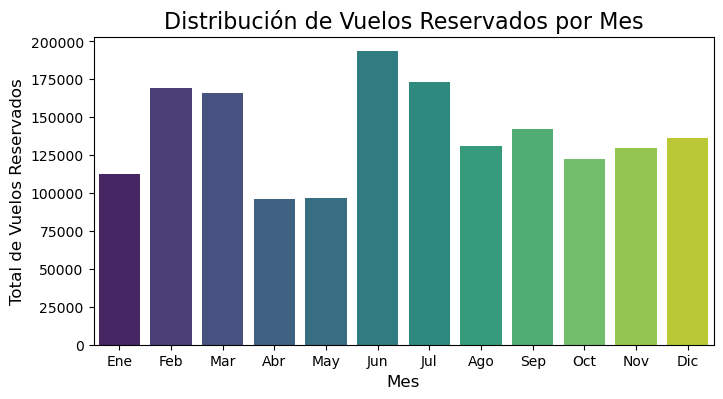

In [109]:
# Agrupar por año y mes para obtener el total de vuelos reservados por mes
monthly_flights = df_combined_outer.groupby(['month'], as_index=False)['flights_booked'].sum()

# Crear gráfico de barras
plt.figure(figsize=(8, 4))
sns.barplot(data=monthly_flights, x='month', y='flights_booked', palette='viridis')

# Personalizar gráficos
plt.title('Distribución de Vuelos Reservados por Mes', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Total de Vuelos Reservados', fontsize=12)
plt.xticks(ticks=range(0, 12), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

# Mostrar gráfico
plt.show()


#### En este gráfico de barras podemos ver que los picos de reservas de vuelos por mes a lo largo del año son entre febrero y marzo y entre junio y julio. Se puede explicar con el hecho de que en muchos países, febrero y marzo coinciden con las vacaciones de invierno o con las vacaciones de primavera o "Spring Break" en América del Norte (EE.UU. y Canadá), especialmente entre los estudiantes universitarios y los colegios. Además está el turismo de invierno y los días festivos, que en febrero en Canada son varios (Día de la familia, día de los Presidentes) y en marzo es semana santa (esta fiesta pero es más de America latina, pero puede que haya muchos inmigrantes que viven en Canada).

#### El periodo de Junio-Julio coincide con las vacaciones escolares en Canadá, eso lo convierte en un periodo en el que las familias pueden concederse viajes largos.

/var/folders/mf/fv1_014j6_d_r5n12hjxrz9r0000gn/T/ipykernel_1656/4112303929.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_combined_outer, x='flights_booked', y='month', palette='viridis')


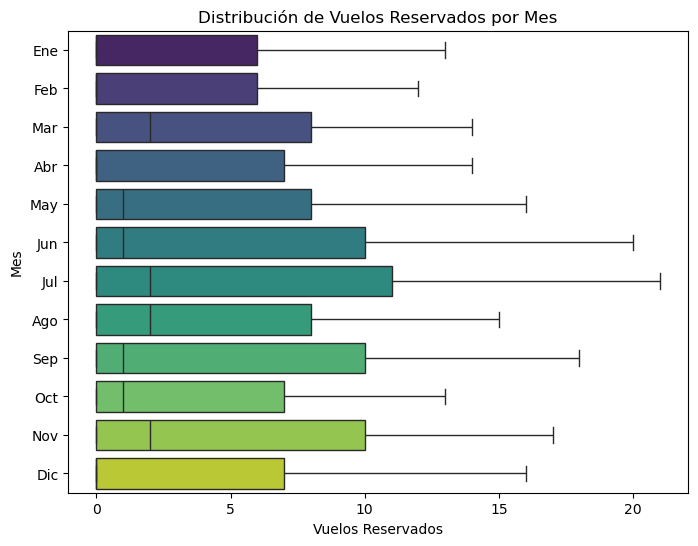

In [110]:
# Pero quiero hacer un boxplot para ver mejor como se distribuyen los datos y si hay outliers:

# Creamos Boxplot 
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_combined_outer, x='flights_booked', y='month', palette='viridis')

# Personalizamos gráfico
plt.title('Distribución de Vuelos Reservados por Mes', fontsize=12)
plt.xlabel('Vuelos Reservados', fontsize=10)
plt.ylabel('Mes', fontsize=10)
plt.yticks(ticks=range(0, 12), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

# Mostramos gráfico
plt.show()



#### Otras observaciones importantes:

- Los meses de verano (junio y julio) tienen las medianas más altas de vuelos reservados.
- Los meses de invierno (enero y febrero) tienen las medianas más bajas.
- Las cajas más largas (como en julio) nos indica un mayor número de vuelos reservados.
- Los bigotes largos indican que hay clientes que reservan muchos más vuelos que la media, especialmente en los meses de verano
- Se nota que las reservas están relacionadas con la estación del año, con picos en la temporada de verano y bajadas en invierno

#### Esto tiene sentido considerando que:

- Como dijimos antes, el verano es la temporada alta de viajes en Canadá
- Las condiciones climáticas en invierno pueden disminuir los viajes
- Las vacaciones escolares y laborales suelen concentrarse en los meses de verano
 

#### PREGUNTA 2:
***¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?***


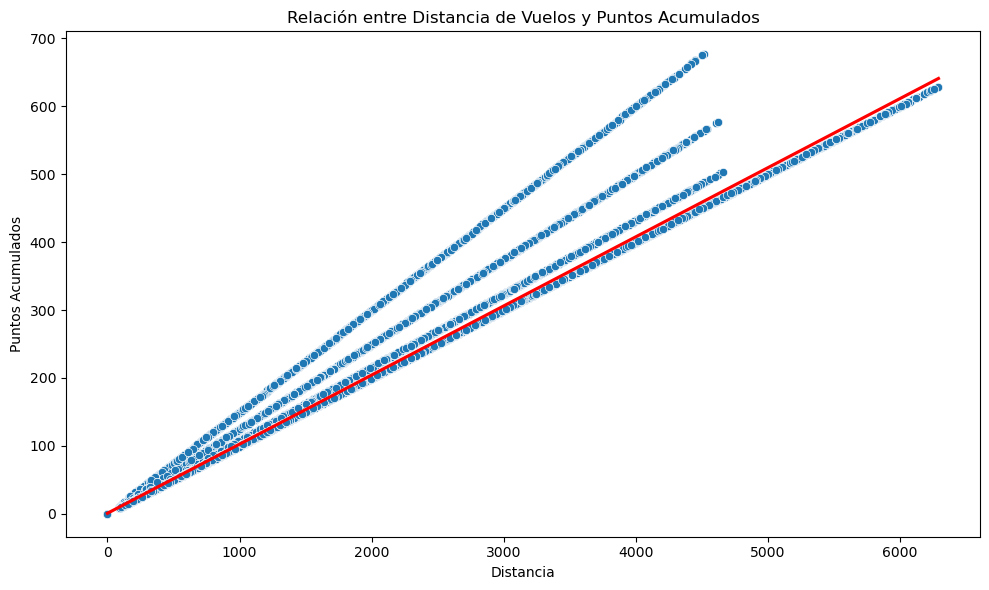

In [111]:

# Creamos un scatter plot para comprobar si hay relación entre distancia de vuelos y puntos:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_combined_outer, x='distance', y='points_accumulated')

# Añadimos una línea de regresión para ver la tendencia
sns.regplot(data=df_combined_outer, x='distance', y='points_accumulated', 
            scatter=False, color='red')

# Personalizamos el gráfico
plt.title('Relación entre Distancia de Vuelos y Puntos Acumulados')
plt.xlabel('Distancia')
plt.ylabel('Puntos Acumulados')

# Ajustamos los márgenes
plt.tight_layout()

# Mostramos el gráfico
plt.show()

In [112]:
correlation = df_combined_outer['distance'].corr(df_combined_outer['points_accumulated'])
print(f"Coeficiente de correlación: {correlation:.4f}")

Coeficiente de correlación: 0.9946


#### Viendo el gráfico de dispersión (scatter plot) y el coeficiente de correlación, puedo hacer un análisis de la relación entre la distancia de los vuelos y los puntos acumulados:

#### Correlación Positiva Muy Fuerte

- El coeficiente de correlación de 0.9946 indica una correlación positiva casi perfecta entre ambas variables.

- Este valor tan cercano a 1 sugiere que la distancia y los puntos acumulados están fuertemente relacionados entre ellos

#### Análisis Visual del Scatter Plot

- Hay varias líneas de tendencia ascendentes y paralelas
- Los puntos forman lineas, con lo cual hay diferentes tasas de acumulación de puntos
- La distribución de los puntos es organizada y constante, no hay puntos atipicos 


#### Interpretación

- Parece que haya diferentes niveles o categorías donde los puntos se acumulan.
- Esto podría indicarnos diferentes formas de acumualción de puntos (probablemente relacionado con el tipo de tarjeta):

  - Categorías de miembros (ejemplo: tarjeta oro, plata y cobre)
  - Tipos de tarifas
  - Clases de vuelo
  - Promociones especiales

#### Implicaciones

- La relación es predecible: se puede saber cuántos puntos acumulará un cliente basado en la distancia del vuelo.
- El sistema de puntos parece estar directamente basado en la distancia recorrida
- La presencia de múltiples líneas sugiere un sistema de recompensas estratificado

#### La respuesta a la pregunta es definitivamente sí: existe una relación muy fuerte y positiva entre la distancia de los vuelos y los puntos acumulados por los clientes, como lo demuestra tanto el análisis visual como el coeficiente de correlación extremadamente alto.

#### PREGUNTA 3:
- ***¿Cuál es la distribución de los clientes por provincia o estado?***

/var/folders/mf/fv1_014j6_d_r5n12hjxrz9r0000gn/T/ipykernel_1656/2777070713.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_clientes_por_provincia.index, y=conteo_clientes_por_provincia.values, palette="Set2")


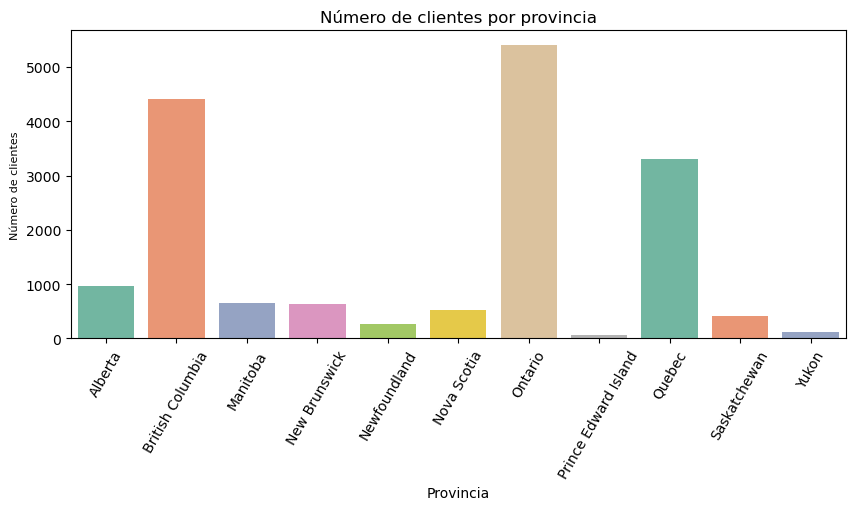

In [113]:
# Agrupamos los clientes por provincias
# Contamos cuántos clientes únicos hay en cada provincia
conteo_clientes_por_provincia = df_combined_outer.groupby('province')['loyalty_number'].nunique()

# Creamos un gráfico de barras
plt.figure(figsize=(10, 4))
sns.barplot(x=conteo_clientes_por_provincia.index, y=conteo_clientes_por_provincia.values, palette="Set2")

# Títulos y etiquetas
plt.title('Número de clientes por provincia', fontsize=12)
plt.xlabel('Provincia', fontsize=10)
plt.ylabel('Número de clientes', fontsize=8)
plt.xticks(rotation=60)  # Rotar etiquetas de provincia para mejorar la visibilidad

# Mostrar el gráfico
plt.show()



#### Las provincias más pobladas de Canadá (2021):

- 1. Ontario: Aproximadamente 14.7 millones de personas.

- 2. Quebec: Aproximadamente 8.5 millones de personas.

- 3. Columbia Británica (British Columbia): Aproximadamente 5.3 millones de personas.

#### Porque el grafico no respeta el orden de tamaño en la distribución de clientes? 

- Vancouver (Columbia Britanica) es una de las ciudades más diversas y de mayor calidad de vida en Canadá, lo que atrae a personas de todo el mundo, tanto para trabajar como para vivir. Esta calidad de vida, junto con las oportunidades laborales, atrae tanto a canadienses como a inmigrantes.

- Aunque Quebec, especialmente Montreal, es una ciudad con una rica vida cultural y un crecimiento constante, su economía no está tan diversificada ni tan desarrollada como la de Ontario o Columbia Británica en términos de sectores como las finanzas o la tecnología.

- Ontario y Columbia Británica son las dos provincias que reciben la mayor cantidad de inmigrantes debido a su tamaño, sus oportunidades laborales y la calidad de vida. Esto se traduce en una mayor diversidad de clientes y un aumento en la demanda de productos y servicios.

- Quebec tiene políticas de inmigración que favorecen a los francófonos y, por tanto, tiene una población inmigrante que en su mayoría habla francés. Esto también puede limitar el tipo de clientes que buscan productos o servicios en inglés o que vienen de otras culturas.


#### PREGUNTA 4:
***¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?***

/var/folders/mf/fv1_014j6_d_r5n12hjxrz9r0000gn/T/ipykernel_1656/143080144.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='education', y='salary', data=salario_promedio, palette='BuGn')


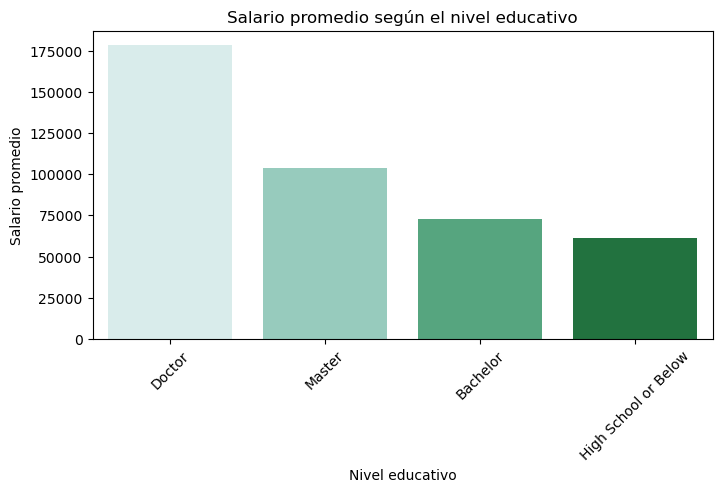

In [114]:
# Para abordar este problema, tenemos que tener en cuenta que la columna salary tiene valores nulos o faltantes. 
# Cuando calculamos el salario promedio, debemos asegurarnos de excluir esos valores nulos para obtener un cálculo correcto. 
# Usaremos la función dropna() para eliminar las filas con valores nulos antes de calcular el salario promedio.

# Primero, eliminamos las filas con valores nulos en la columna 'salary'
df_combined_outer_clean = df_combined_outer.dropna(subset=['salary'])

# Calculamos el salario promedio por nivel educativo
salario_promedio = df_combined_outer_clean.groupby('education')['salary'].mean().reset_index()

# Ordenamos los resultados por salario promedio (de mayor a menor)
salario_promedio = salario_promedio.sort_values(by='salary', ascending=False)

# Creamos un gráfico de barras para visualizar la comparación de salarios promedio
plt.figure(figsize=(8, 4))
sns.barplot(x='education', y='salary', data=salario_promedio, palette='BuGn')

# Títulos y etiquetas
plt.title('Salario promedio según el nivel educativo', fontsize=12)
plt.xlabel('Nivel educativo', fontsize=10)
plt.ylabel('Salario promedio', fontsize=10)
plt.xticks(rotation=45)  # Rotar las etiquetas para mejor visibilidad

# Mostrar el gráfico
plt.show()



#### El análisis del salario promedio según el nivel educativo revela una clara relación entre el nivel de educación y el salario promedio.
 
No nos sorprende, ya que Canadá suele tener un sistema bastante gratificante desde un punto de vista meritocratico, o por lo menos es lo que se percibe desde aquí.

Este grafico nos confirma que si una persona tiene un buen nivel de estudio, puede ambir a tener puestos de responsabilidad y mejores sueldos.

#### Conclusión:
Este análisis refuerza la idea de que la educación sigue siendo un factor determinante en las oportunidades salariales, por lo menos en Canadá. A medida que se aumenta el nivel educativo, el salario promedio tiende a aumentar, y esto se refleja en este conjunto de datos.

#### PREGUNTA 5:
- ***¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?***

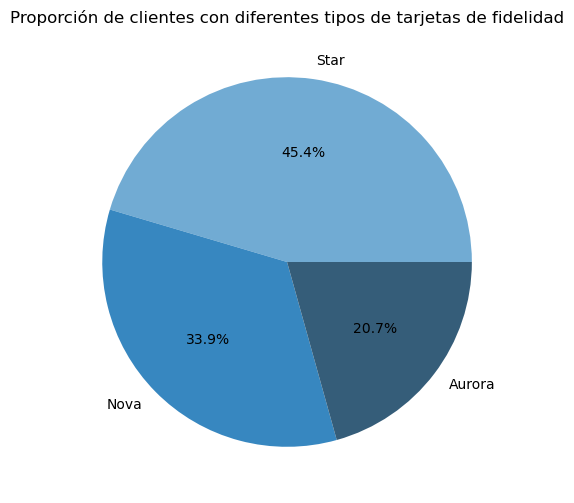

In [115]:
# Gráfico de torta para mostrar la proporción de clientes con cada tipo de tarjeta:

# Calculamos la proporción de clientes con cada tipo de tarjeta
proporciones = df_combined_outer['loyalty_card'].value_counts(normalize=True)


plt.figure(figsize=(6, 6))
proporciones.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("Blues_d", len(proporciones)))

# Añadir título
plt.title("Proporción de clientes con diferentes tipos de tarjetas de fidelidad")
plt.ylabel('')  # Eliminar la etiqueta del eje y

# Mostrar el gráfico
plt.show()


La tarjeta de fidelidad más frecuente es la Star (45,4%), seguida por Nova (33,9%) y Aurora (20,7%)

#### PREGUNTA 6:
***¿Cómo se distribuyen los clientes según su estado civil y género?***

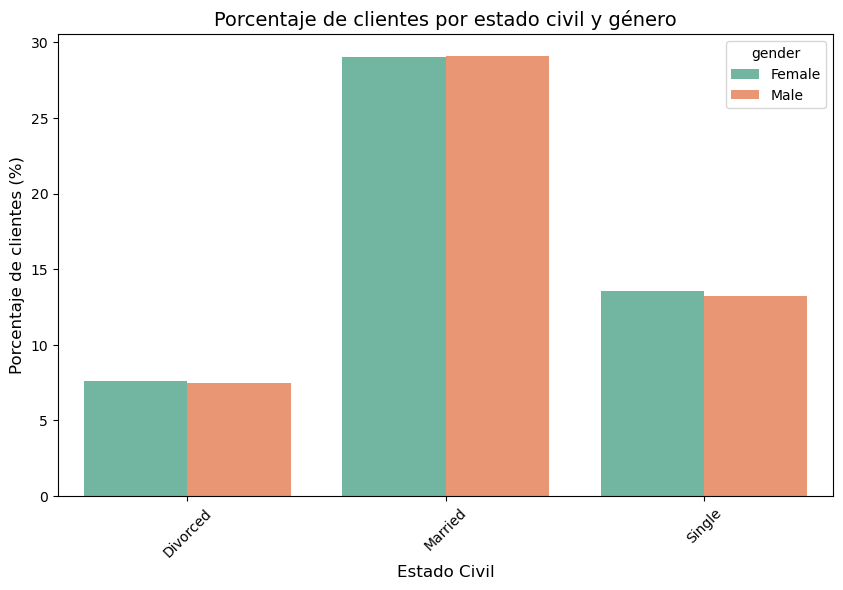

  marital_status  gender   count  percentage
0       Divorced  Female   30888    7.614934
1       Divorced    Male   30288    7.467014
2        Married  Female  117816   29.045619
3        Married    Male  117984   29.087036
4         Single  Female   54936   13.543577
5         Single    Male   53712   13.241820


In [116]:

# Asegúrate de que no haya valores nulos en 'gender' y 'marital_status'
df_combined_outer_clean = df_combined_outer.dropna(subset=['gender', 'marital_status'])

# Contamos las ocurrencias de cada combinación
conteo = df_combined_outer_clean.groupby(['marital_status', 'gender']).size().reset_index(name='count')

# Calculamos el total de registros
total = conteo['count'].sum()

# Calculamos el porcentaje de cada combinación
conteo['percentage'] = (conteo['count'] / total) * 100

# Creamos un gráfico de barras para mostrar los porcentajes
plt.figure(figsize=(10, 6))
sns.barplot(x='marital_status', y='percentage', hue='gender', data=conteo, palette='Set2')

# Títulos y etiquetas
plt.title('Porcentaje de clientes por estado civil y género', fontsize=14)
plt.xlabel('Estado Civil', fontsize=12)
plt.ylabel('Porcentaje de clientes (%)', fontsize=12)
plt.xticks(rotation=45)  # Rotar las etiquetas si es necesario

# Mostrar el gráfico
plt.show()

# Imprimir los porcentajes (opcional, si quieres ver los valores numéricos)
print(conteo)


#### Distribución por estado civil:

- El estado civil más común es el de casado (Married), que representa aproximadamente el 58.13% del total de clientes (sumando tanto a hombres como mujeres). Esto refleja una tendencia común en muchas poblaciones, donde el matrimonio es una de las situaciones más frecuentes.

- Divorciados representan el 15.08% del total, con una ligera diferencia entre hombres y mujeres.

- Finalmente, el grupo de solteros (Single) constituye el 26.78% de la base de clientes, siendo también un segmento bastante grande. Esto puede reflejar una muestra representativa de personas jóvenes, solteras o aquellos en procesos de cambio en sus vidas personales.

#### Distribución por género:

- Mujeres (Female) representan aproximadamente 57.34% del total de clientes, mientras que hombres (Male) constituyen el 42.66% restante. Aunque hay una ligera inclinación hacia la mayor representación femenina, la diferencia no es tan significativa.


#### Conclusiones:
La mayoría de los clientes están casados, lo cual es un reflejo de esta sociedad, las porcentajes son representativas de la población de Canadá.

